In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import glob
from scipy import stats
import skimage
from statistics import multimode
from sklearn.linear_model import LinearRegression

In [2]:
#load the mtr means
mtr_means = pd.read_csv("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/analysis/comparison_with_IHC/mtr_mbp_correlation_csvs/mtr_means_cc_for_correlation.csv")
mtr_means_denoised = pd.read_csv("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/analysis/comparison_with_IHC/mtr_mbp_correlation_csvs/mtr_means_cc_for_correlation_denoised.csv")

In [3]:
#load mbp pixel values
mbp_001 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*001*")
mbp_002 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*002*")
mbp_003 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*003*")
mbp_004 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*004*")
mbp_005 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*005*")
mbp_006 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*006*")
mbp_007 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*007*")
mbp_008 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*008*")
mbp_009 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*009*")
mbp_010 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*010*")
mbp_011 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*011*")
mbp_012 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*012*")
mbp_013 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*013*")
mbp_014 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*014*")
mbp_015 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*015*")
mbp_016 = glob.glob("/data/chamal/projects/mila/2019_MTR_on_Cryoprobe/5_cuprizone_validation/derivatives/histology/csvs_of_corpus_callosum_pixel_intensities/*016*")

In [8]:
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rc('axes', labelsize=25) 
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman')

# SECTION 1: Combine the pixel intensities from all slices into a single array per subject - extract metrics like mean, area etc

Fiji generates one csv per histological slice. We want to combine all of these together for each subject. Then we can plot histograms of all the stain intensities per subject, we can calculate the histogram mean and mode. These on their own are not well correlated with the MTR values, but we will need them later on

In [4]:
mbp_mean = np.zeros(16)
mbp_std = np.zeros(16)
mbp_mode = np.zeros(16)
mbp_quartile1 = np.zeros(16)
mbp_quartile3 = np.zeros(16)
mbp_intden_overall = np.zeros(16)
mbp_mean_avgslice = np.zeros(16)
mbp_std_avgslice = np.zeros(16)
mbp_mode_avgslice = np.zeros(16)
mbp_quartile1_avgslice = np.zeros(16)
mbp_quartile3_avgslice = np.zeros(16)
mbp_standard_mean_avgslice = np.zeros(16)

In [5]:
def extract_mbp_metrics(mbp_subject):
    num_slides = len(mbp_subject)
    
    #initialize empty arrays
    arr_all_pixels = np.empty((0,), int)
    mean_per_slide = np.zeros(num_slides)
    std_per_slide = np.zeros(num_slides)
    mode_per_slide = np.zeros(num_slides)
    quartile1_per_slide = np.zeros(num_slides)
    quartile3_per_slide = np.zeros(num_slides)
    standard_mean_per_slide = np.zeros(num_slides)
    
    #iterate over slides per subject
    for i in range(0, num_slides):
        
        #extract intensities
        intensity_values = np.array(pd.read_csv(mbp_subject[i]).values[:,2])
        std_per_slide[i] = np.std(intensity_values)
        standard_intensity_values = intensity_values/std_per_slide[i]
        arr_all_pixels = np.append(arr_all_pixels, intensity_values, axis=0)
        standard_arr_all_pixels = np.append(arr_all_pixels, standard_intensity_values, axis=0)
        mean_per_slide[i] = np.mean(intensity_values)
        quartile1_per_slide[i] = np.quantile(standard_intensity_values,0.25)
        quartile3_per_slide[i] = np.quantile(standard_intensity_values,0.75)
        mode_per_slide[i] = multimode(standard_intensity_values)[0]
        standard_mean_per_slide[i] = np.mean(standard_intensity_values)

    #calculate metrics for each subject
    subject_standard_mean = np.mean(standard_arr_all_pixels)
    subject_standard_std = np.std(standard_arr_all_pixels)
    subject_standard_quartile1 = np.quantile(standard_arr_all_pixels,0.25)
    subject_standard_quartile3 = np.quantile(standard_arr_all_pixels,0.75)
    subject_standard_mode = multimode(standard_arr_all_pixels)[0]
    
    subject_mean_avgslice = np.mean(mean_per_slide)
    subject_std_avgslice = np.mean(std_per_slide)
    subject_standard_mode_avgslice = np.mean(mode_per_slide)
    subject_standard_quartile1_avgslice = np.mean(quartile1_per_slide)
    subject_standard_quartile3_avgslice = np.mean(quartile3_per_slide)
    subject_standard_mean_avgslice = np.mean(standard_mean_per_slide)
    
    return subject_standard_mean, subject_standard_std, subject_standard_mode, subject_standard_quartile1, subject_standard_quartile3, subject_mean_avgslice,subject_std_avgslice , subject_standard_mode_avgslice, subject_standard_quartile1_avgslice, subject_standard_quartile3_avgslice, subject_standard_mean_avgslice, arr_all_pixels, standard_arr_all_pixels

In [6]:
#extract the MBP metrics for each subject
mbp_mean[0], mbp_std[0], mbp_mode[0], mbp_quartile1[0], mbp_quartile3[0], mbp_mean_avgslice[0], mbp_std_avgslice[0],  mbp_mode_avgslice[0], mbp_quartile1_avgslice[0],mbp_quartile3_avgslice[0],mbp_standard_mean_avgslice[0], mbp_001_all_pixels, mbp_001_all_pixels_standard = extract_mbp_metrics(mbp_001)
mbp_mean[1], mbp_std[1], mbp_mode[1],mbp_quartile1[1], mbp_quartile3[1], mbp_mean_avgslice[1], mbp_std_avgslice[1], mbp_mode_avgslice[1],mbp_quartile1_avgslice[1],mbp_quartile3_avgslice[1], mbp_standard_mean_avgslice[1],mbp_002_all_pixels, mbp_002_all_pixels_standard = extract_mbp_metrics(mbp_002)
mbp_mean[2], mbp_std[2], mbp_mode[2], mbp_quartile1[2], mbp_quartile3[2],mbp_mean_avgslice[2], mbp_std_avgslice[2], mbp_mode_avgslice[2], mbp_quartile1_avgslice[2],mbp_quartile3_avgslice[2],mbp_standard_mean_avgslice[2],mbp_003_all_pixels, mbp_003_all_pixels_standard = extract_mbp_metrics(mbp_003)
mbp_mean[3], mbp_std[3], mbp_mode[3], mbp_quartile1[3], mbp_quartile3[3],mbp_mean_avgslice[3], mbp_std_avgslice[3], mbp_mode_avgslice[3], mbp_quartile1_avgslice[3],mbp_quartile3_avgslice[3],mbp_standard_mean_avgslice[3],mbp_004_all_pixels, mbp_004_all_pixels_standard = extract_mbp_metrics(mbp_004)
mbp_mean[4], mbp_std[4], mbp_mode[4], mbp_quartile1[4], mbp_quartile3[4], mbp_mean_avgslice[4], mbp_std_avgslice[4], mbp_mode_avgslice[4],mbp_quartile1_avgslice[4],mbp_quartile3_avgslice[4], mbp_standard_mean_avgslice[4],mbp_005_all_pixels, mbp_005_all_pixels_standard = extract_mbp_metrics(mbp_005)
mbp_mean[5], mbp_std[5], mbp_mode[5], mbp_quartile1[5], mbp_quartile3[5],mbp_mean_avgslice[5], mbp_std_avgslice[5], mbp_mode_avgslice[5], mbp_quartile1_avgslice[5],mbp_quartile3_avgslice[5],mbp_standard_mean_avgslice[5],mbp_006_all_pixels, mbp_006_all_pixels_standard = extract_mbp_metrics(mbp_006)
mbp_mean[6], mbp_std[6], mbp_mode[6], mbp_quartile1[6], mbp_quartile3[6],mbp_mean_avgslice[6], mbp_std_avgslice[6], mbp_mode_avgslice[6], mbp_quartile1_avgslice[6],mbp_quartile3_avgslice[6],mbp_standard_mean_avgslice[6],mbp_007_all_pixels, mbp_007_all_pixels_standard = extract_mbp_metrics(mbp_007)
mbp_mean[7], mbp_std[7], mbp_mode[7], mbp_quartile1[7], mbp_quartile3[7], mbp_mean_avgslice[7], mbp_std_avgslice[7], mbp_mode_avgslice[7],mbp_quartile1_avgslice[7],mbp_quartile3_avgslice[7], mbp_standard_mean_avgslice[7],mbp_008_all_pixels, mbp_008_all_pixels_standard = extract_mbp_metrics(mbp_008)

In [7]:
mbp_mean[8], mbp_std[8], mbp_mode[8], mbp_quartile1[8], mbp_quartile3[8],mbp_mean_avgslice[8], mbp_std_avgslice[8], mbp_mode_avgslice[8], mbp_quartile1_avgslice[8],mbp_quartile3_avgslice[8],mbp_standard_mean_avgslice[8],mbp_009_all_pixels, mbp_009_all_pixels_standard = extract_mbp_metrics(mbp_009)
mbp_mean[9], mbp_std[9], mbp_mode[9], mbp_quartile1[9], mbp_quartile3[9],mbp_mean_avgslice[9], mbp_std_avgslice[9],mbp_mode_avgslice[9], mbp_quartile1_avgslice[9],mbp_quartile3_avgslice[9],mbp_standard_mean_avgslice[9], mbp_010_all_pixels, mbp_010_all_pixels_standard = extract_mbp_metrics(mbp_010)
mbp_mean[10], mbp_std[10], mbp_mode[10], mbp_quartile1[10], mbp_quartile3[10],mbp_mean_avgslice[10], mbp_std_avgslice[10], mbp_mode_avgslice[10],mbp_quartile1_avgslice[10],mbp_quartile3_avgslice[10],mbp_standard_mean_avgslice[10],mbp_011_all_pixels, mbp_011_all_pixels_standard = extract_mbp_metrics(mbp_011)
mbp_mean[11], mbp_std[11],  mbp_mode[11], mbp_quartile1[11], mbp_quartile3[11],mbp_mean_avgslice[11], mbp_std_avgslice[11], mbp_mode_avgslice[11], mbp_quartile1_avgslice[11],mbp_quartile3_avgslice[11],mbp_standard_mean_avgslice[11],mbp_012_all_pixels, mbp_012_all_pixels_standard = extract_mbp_metrics(mbp_012)
mbp_mean[12], mbp_std[12], mbp_mode[12], mbp_quartile1[12], mbp_quartile3[12],mbp_mean_avgslice[12], mbp_std_avgslice[12], mbp_mode_avgslice[12],mbp_quartile1_avgslice[12],mbp_quartile3_avgslice[12], mbp_standard_mean_avgslice[12],mbp_013_all_pixels, mbp_013_all_pixels_standard = extract_mbp_metrics(mbp_013)
mbp_mean[13], mbp_std[13], mbp_mode[13], mbp_quartile1[13], mbp_quartile3[13],mbp_mean_avgslice[13], mbp_std_avgslice[13], mbp_mode_avgslice[13],mbp_quartile1_avgslice[13],mbp_quartile3_avgslice[13], mbp_standard_mean_avgslice[13],mbp_014_all_pixels, mbp_014_all_pixels_standard = extract_mbp_metrics(mbp_014)
mbp_mean[14], mbp_std[14], mbp_mode[14], mbp_quartile1[14], mbp_quartile3[14],mbp_mean_avgslice[14], mbp_std_avgslice[14], mbp_mode_avgslice[14],mbp_quartile1_avgslice[14],mbp_quartile3_avgslice[14], mbp_standard_mean_avgslice[14],mbp_015_all_pixels, mbp_015_all_pixels_standard = extract_mbp_metrics(mbp_015)
mbp_mean[15], mbp_std[15], mbp_mode[15], mbp_quartile1[15], mbp_quartile3[15],mbp_mean_avgslice[15], mbp_std_avgslice[15], mbp_mode_avgslice[15],mbp_quartile1_avgslice[15],mbp_quartile3_avgslice[15], mbp_standard_mean_avgslice[15],mbp_016_all_pixels, mbp_016_all_pixels_standard = extract_mbp_metrics(mbp_016)

# Section 2: Plot histograms of subject-specific pixel intensities (for paper)

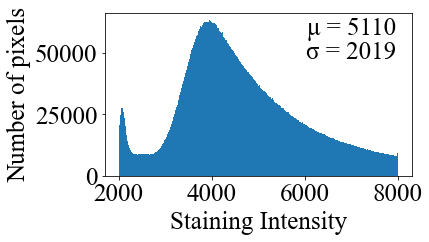

In [10]:
#for each subject, we can plot a histogram of all pixel intensities, and the location of the most common stain intensity.
#HISTOGRAM BEFORE STANDARDIZING BY STD
plt.figure(figsize = (5.5,3))
myrange = [2000,8000]
mybins = 1000

plt.ylabel("Number of pixels", fontsize =25)
plt.xlabel("Staining Intensity", fontsize =25)

plt.hist(mbp_009_all_pixels, bins=mybins, range = myrange)
plt.text(7000,60000,'\u03BC = 5110', horizontalalignment='center',verticalalignment='center', fontsize = 25)
plt.text(7000,50000,'\u03C3 = 2019', horizontalalignment='center',verticalalignment='center', fontsize = 25)
plt.show()

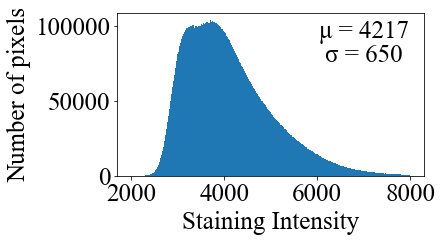

In [12]:
#for each subject, we can plot a histogram of all pixel intensities, and the location of the most common stain intensity.
#Histogram for control subject before standardizing
plt.figure(figsize = (5.5,3))
myrange = [2000,8000]
mybins = 1000

plt.ylabel("Number of pixels", fontsize =25)
plt.xlabel("Staining Intensity", fontsize =25)

plt.hist(mbp_007_all_pixels, bins=mybins, range = myrange)
plt.text(7000,96000,'\u03BC = 4217', horizontalalignment='center',verticalalignment='center', fontsize = 25)
plt.text(7000,80000,'\u03C3 = 650', horizontalalignment='center',verticalalignment='center', fontsize = 25)
plt.show()

# Section 3: Calculate correlations:

In [15]:
#calculate correlation between MBP mean and standard deviation (before standardizing)
scipy.stats.pearsonr(mbp_mean_avgslice[0:16], mbp_std_avgslice[0:16])

(0.8476107283493108, 3.3866061313504855e-05)

In [17]:
#calculate correlation between MTR (Denoised) and mean of MBP standardized distribution
scipy.stats.pearsonr(mtr_means_denoised[' mean'][0:16], mbp_standard_mean_avgslice[0:16])

(0.7513397838782783, 0.0007925887060120071)

# Section 4: Plot figures (from paper) and linear regression lines:

In [18]:
reg = LinearRegression().fit(mbp_std_avgslice.reshape(-1, 1), mbp_mean_avgslice)
line_mbp_std_to_mean = reg.predict(np.arange(500,3000, 500).reshape(-1, 1))

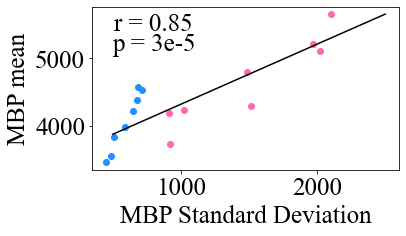

In [25]:
#plot the points representing the correlation
plt.figure(figsize = (5.5,3))
plt.plot(mbp_std_avgslice[[0,1,4,5,8,9,12,13]], mbp_mean_avgslice[[0,1,4,5,8,9,12,13]], 'o', color = 'hotpink', label = 'Cuprizone') 
plt.plot(mbp_std_avgslice[[2,3,6,7,10,11,14,15]], mbp_mean_avgslice[[2,3,6,7,10,11,14,15]], 'o', color = 'dodgerblue', label = 'Control') 
plt.plot(np.arange(500,3000, 500).reshape(-1, 1), line_mbp_std_to_mean, color = 'black')
plt.text(800,5500,'r = 0.85', horizontalalignment='center',verticalalignment='center', fontsize = 25)
plt.text(800,5200,'p = 3e-5', horizontalalignment='center',verticalalignment='center', fontsize = 25)
plt.xlabel("MBP Standard Deviation")
plt.ylabel("MBP mean")
plt.show()

In [22]:
reg = LinearRegression().fit(mbp_standard_mean_avgslice.reshape(-1, 1), 100*mtr_means_denoised[' mean'][0:16])
line_mbp_mean_over_std = reg.predict(np.arange(2,9, 0.5).reshape(-1, 1))

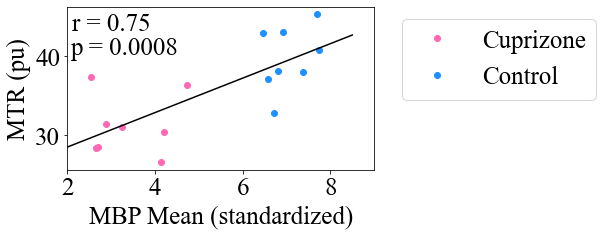

In [32]:
#plot the points representing the correlation
plt.figure(figsize = (5.5,3))
plt.plot(mbp_standard_mean_avgslice[[0,1,4,5,8,9,12,13]], 100*mtr_means_denoised[' mean'][[0,1,4,5,8,9,12,13]], 'o', color = 'hotpink', label = 'Cuprizone') 
plt.plot(mbp_standard_mean_avgslice[[2,3,6,7,10,11,14,15]], 100*mtr_means_denoised[' mean'][[2,3,6,7,10,11,14,15]], 'o', color = 'dodgerblue', label = 'Control') 
plt.plot(np.arange(2,9, 0.5).reshape(-1, 1),line_mbp_mean_over_std, color = 'black' )
plt.text(3,44,'r = 0.75', horizontalalignment='center',verticalalignment='center', fontsize = 25)
plt.text(3.3,41,'p = 0.0008', horizontalalignment='center',verticalalignment='center', fontsize = 25)
plt.legend(fontsize = 25,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("MBP Mean (standardized)")
plt.ylabel("MTR (pu)")
plt.xlim(2,9)
plt.show()